In [4]:
library(snpStats)
library(TCA)
library(pracma)
library(matrixcalc)
library(Smisc)
library(stats)

In [7]:
snp_path1 = '/u/project/sriram/bjew/dutch/GenomTranscriptomTwinsMD_c1'
# snp_path = '/u/home/q/qmaai/project-sriram/tca-twas/data/original_data_copy/plink'
snp_path = '/u/home/q/qmaai/project-sriram/tca-twas/data/pruned_data/dutch_filted_individual_ld_pruned'
read_snp <- function(snp_path,select.snps){
    snps = read.plink(snp_path)
    wrong_snps = rownames(snps$map[snps$map$chromosome>23,])
    snps$genotypes = snps$genotypes[,!(colnames(snps$genotypes) %in% wrong_snps)]
    #snps$genotype = apply(snps$genotype,2,as.integer)
    snps$map = snps$map[snps$map$chromosome<24,]
    return(snps)
}
snps = read_snp(snp_path)
snps1_ = read_snp(snp_path1)

Warning message in .local(x, i, j, ..., drop):
“Output  SnpMatrix has more than 2^31-1 elements. Many functions do not support such objects”

In [22]:
dim(snps1_$genotype)
dim(snps$genotype)
dim(prop)
dim(geno_locs)
dim(ge)

[1]   5061 801501

[1]   1464 319354

[1] 1464    5

[1] 10201     3

[1] 10201  1464

In [23]:
prop

,neutn,lympn,monon,eosn,bason
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51143,0.5858586,0.3030303,0.06060606,0.04040404,0.01010101
51146,0.7700000,0.1300000,0.09000000,0.01000000,0.00000000
51150,0.4200000,0.4400000,0.10000000,0.03000000,0.01000000
51160,0.6200000,0.2200000,0.11000000,0.04000000,0.01000000
51163,0.4700000,0.3900000,0.11000000,0.03000000,0.00000000
51167,0.6200000,0.2700000,0.08000000,0.02000000,0.01000000
51169,0.4700000,0.4200000,0.07000000,0.03000000,0.01000000
51170,0.4554455,0.4257426,0.06930693,0.03960396,0.00990099
51172,0.5500000,0.3100000,0.09000000,0.05000000,0.00000000


In [6]:
tab = as.data.frame(table(apply(snps1_$genotype[,1:1000],2,function(x) sum(as.integer(x=='00')))))

ERROR: Error in apply(snps1_$genotype[, 1:1000], 2, function(x) sum(as.integer(x == : object 'snps1_' not found


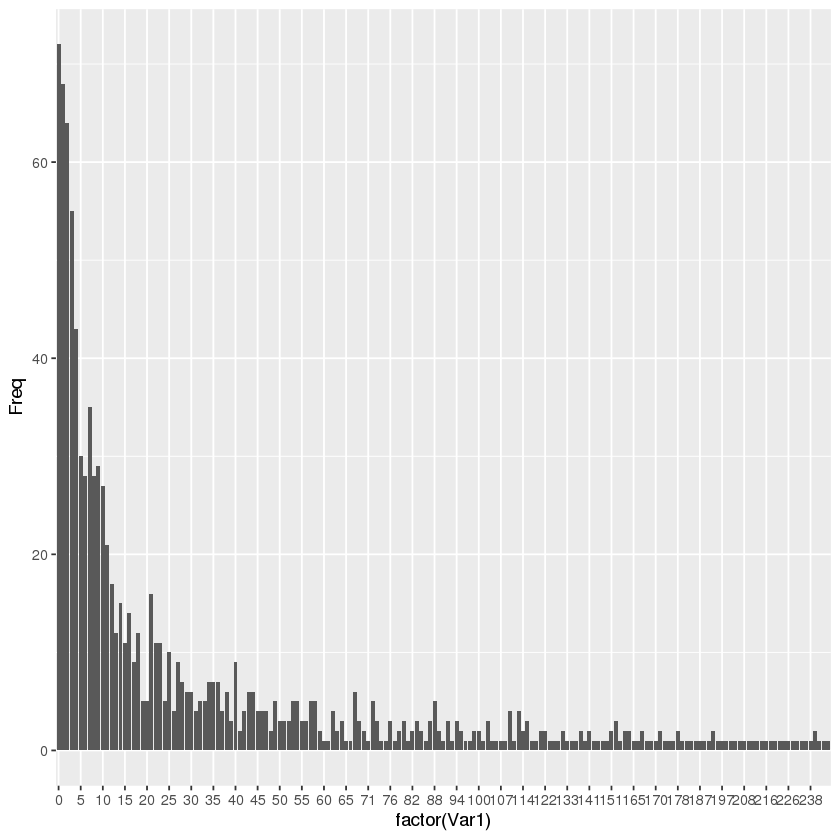

In [183]:
library(ggplot2)
var1 = tab$Var1
ggplot(tab, aes(x=factor(Var1),y = Freq))+geom_bar(stat = "identity") + scale_x_discrete(breaks = var1[c(T,F,F,F,F)])

In [8]:
geno_locs_path = '/u/project/sriram/bjew/dutch/dutch_gene_locs.csv'
read_geno_locs <- function(geno_locs_path){
    geno_locs = read.csv(geno_locs_path)
    geno_locs$CHROM = substr(geno_locs$CHROM,4,6)
    geno_locs$CHROM = gsub('X','23',geno_locs$CHROM)
    geno_locs$CHROM = as.integer(gsub('Y','24',geno_locs$CHROM))
    geno_locs = geno_locs[geno_locs$CHROM<24,]
    rownames(geno_locs) = geno_locs$GENE
    geno_locs = geno_locs[,c(2:ncol(geno_locs))]
    return(geno_locs[order(geno_locs$CHROM,geno_locs$START),])
}
geno_locs = read_geno_locs(geno_locs_path)

In [9]:
GE_path = '/u/project/sriram/bjew/dutch/dutch_expression_without_rbc.csv'
ge = read.csv(GE_path,row.names=1)
colnames(ge) = substr(colnames(ge),2,10)
ge = ge[,colnames(ge) %in% rownames(snps$genotype)]
ge = ge[(rownames(ge) %in% rownames(geno_locs)),]
ge = ge[,order(colnames(ge))]

In [10]:
snps$fam = snps$fam[rownames(snps$fam) %in% colnames(ge),]
snps$genotype = snps$genotype[rownames(snps$genotype) %in% colnames(ge),]
snps$fam = snps$fam[order(rownames(snps$fam)),]
snps$genotype = snps$genotype[order(rownames(snps$genotype)),]

In [81]:
# testt = as(snps$genotype,'numeric')
# testt[is.na(testt)] = 2
# snps.class<-new("SnpMatrix", testt+1)
# run this only once to produce to produce the filted individual bed files further for LD pruning
# chromosome = snps$map$chromosome
# chromosome[chromosome==23] = 'X'
# write.plink('/u/home/q/qmaai/project-sriram/tca-twas/data/pruned_data/dutch_filtered_individual_numeric',snp.major = TRUE,
#            snps=snps.class,pedigree=snps$fam$pedigree,id=snps$fam$member,sex=snps$fam$sex,
#           phenotype=snps$fam$affected,chromosome=chromosome,position=snps$map$position)

coercing object of mode  numeric  to SnpMatrix
Writing FAM file to /u/home/q/qmaai/project-sriram/tca-twas/data/pruned_data/dutch_filtered_individual_numeric.fam 
Writing extended MAP file to /u/home/q/qmaai/project-sriram/tca-twas/data/pruned_data/dutch_filtered_individual_numeric.bim 
Writing BED file to /u/home/q/qmaai/project-sriram/tca-twas/data/pruned_data/dutch_filtered_individual_numeric.bed (SNP-major mode)


NULL

In [11]:
prop_path = '/u/project/sriram/bjew/dutch/dutch_props.csv'
prop = read.csv(prop_path,row.names=1)
prop = prop[rownames(prop) %in% colnames(ge),]
prop = prop[order(rownames(prop)),]

In [24]:
# give me one G_locs
flank = 1000000
find_cis_snps_gene <-function(S_geno,G_locs,S_map,G,threshold=0){
    G_locs = G_locs[G,]
    S_map = S_map[S_map$chromosome==G_locs$CHROM,]
    cis_snps = S_map[((S_map$position>G_locs$START-flank) & (S_map$position<G_locs$START))
                              | ((S_map$position<G_locs$END+flank) & (S_map$position>G_locs$END)),]
    print(dim(cis_snps))
    if(threshold!=0){
        dis = pmax(cis_snps$position-G_locs$END,G_locs$START-cis_snps$position)
        cis_snps = cis_snps[c(rank(dis) <= threshold),]
    }
    return(S_geno[,colnames(S_geno) %in% rownames(cis_snps)])
}
# find_cis_snps_gene(snps$geno,geno_locs,snps$map,1)

In [28]:
tca_twas_data_prep　<- function(snps,geno_locs,ge,cell_w,g){
    # snps NxD
    # ge NxM
    # g the index of gene for ge
    gene = rownames(ge)[g]
    threshold = floor(((dim(snps$genotype)[1])/(dim(cell_w)[2]))-1)
    snps_raw = find_cis_snps_gene(snps$genotype,geno_locs,snps$map,gene,threshold=threshold)
    snps_ = as(snps_raw,"numeric")
    snps_[is.na(snps_)] = 2
    # snps_ = apply(snps_,2,as.integer)
    # as(snps$genotype[c(1:100),c(1:100)],"numeric")
    return(list('X'=snps_,
                'X_raw'=snps_raw,
                'G'=ge[gene,],
                'W'=cell_w))
}

In [26]:
check_bad_snps_for_gene <- function(snps,geno_locs,ge,cell_w,g){
    
    gene = rownames(ge)[g]
    train_X_raw = find_cis_snps_gene(snps$genotype,geno_locs,snps$map,gene,dim(snps$genotype)[1])
    train_X = as(train_X_raw,"numeric")
    train_X[is.na(train_X)] = 2
    W = cell_w
    k = ncol(W)
    n = nrow(W)
    W_norms <- rowSums(W**2)**0.5
    W_tilde <- W/t(repmat(W_norms,k,1))

    bad_rows = array(0,ncol(train_X))
    for (i in 1:ncol(train_X)){
        train_X_ = matrix(train_X[,i],nrow=nrow(train_X),ncol=1)
        C1_ = hadamard.prod(Reshape(Reshape(apply(W, 2, function(v) repmat(v,1,1)), n*k,1), n,k), repmat(train_X_, 1, k))
        C1_tilde <- C1_/t(repmat(W_norms,k,1))
        D = as.matrix(cbind(W_tilde,C1_tilde))
        if(qr(D)$rank<dim(D)[2]){
            bad_rows[i] = 1
        }
    }
    bad_rows = which(bad_rows==1)
    bad_snps = colnames(train_X_raw[,c(bad_rows)])
    summary = col.summary(train_X_raw)
    summary = summary[order(summary$MAF),]
    bad_snps_position = which(rownames(summary) %in% bad_snps)
    bad_snps_maf = summary$MAF[c(bad_snps_position)]
    bad_snps = rownames(summary[c(bad_snps_position),])
    return(list('snps_num'=nrow(summary),
                'bad_snps'=bad_snps,
                'bad_snps_position_in_least_maf_rank'=bad_snps_position,
                'bad_snps_maf'=bad_snps_maf))
}

In [54]:
bad_snps = check_bad_snps_for_gene(snps,geno_locs,ge,prop,1)

[1] 179   6


In [58]:
# for each gene, extract the bad snps
li = c(109,120,132,192,197,225)
rr = lapply(li,function(x) check_bad_snps_for_gene(snps,geno_locs,ge,prop,x))
bad_snps = list()
maf = list()
for (i in 1:length(rr)){
    bad_snps = append(bad_snps,rr[[i]]$bad_snps)
    maf = append(maf,rr[[i]]$bad_snps_maf)
}
bad_snps_df = do.call(rbind, Map(data.frame, SNP_NAME=bad_snps, MAF=maf))
bad_snps_df = unique(bad_snps_df)
bad_snps_df = bad_snps_df[order(bad_snps_df$MAF),]

In [105]:
failed = array(0,length(li))
for (i in 1:length(li)){
    gene_index = li[i]
    data = tca_twas_data_prep(snps,geno_locs,ge,prop[,1:4],g=gene_index)
    X=data[['X']]
    X_raw = data[['X_raw']]
    W = data[['W']]
    # This is the reason why bason should be removed
    # apply(W,2,function(x) sum(as.integer(x==0))/nrow(W))
    W = (W[,c(1:4)])/rowSums(W[,c(1:4)])
    G = data[['G']]
    X = X[,!colnames(X) %in% rr[[i]]$bad_snps]
    rnm = matrix(rnorm(ncol(X)*nrow(X),mean=0,sd=0.1),ncol=ncol(X),nrow=nrow(X))
    X_raw = X_raw[,!colnames(X_raw) %in% rr[[i]]$bad_snps]
    tryCatch({
        tca.mdl <- tca(X=G,W=W,C1=X+rnm,verbose=FALSE)
    },error=function(e){
        print(paste(li[i],dim(X)[2],sep=' '))
        failed[i]=1})
}

[1] 447   6
[1] 413   6
[1] 432   6
[1] 453   6
[1] 456   6
[1] 414   6


In [22]:
W = W
k = ncol(W)
W_norms <- rowSums(W**2)**0.5
W_tilde <- W/t(repmat(W_norms,k,1))
C2 <- matrix(0, nrow=ncol(G), ncol=0)

train_X_ = X
n = nrow(W)
k = ncol(W)
p1 = ncol(train_X_)
C1_ = hadamard.prod(Reshape(Reshape(apply(W, 2, function(v) repmat(v,1,p1)), n*p1*k,1), n,p1*k), repmat(train_X_, 1, k))
C1_tilde <- C1_/t(repmat(W_norms,k*p1,1))
D = as.matrix(cbind(W_tilde,C2,C1_tilde))
Dmat <- t(D) %*% D
Dmat = round(Dmat,5)
print('W_tilde')
dim(W_tilde)
qr(W_tilde)$rank
print('C1')
dim(C1_)
qr(C1_)$rank
print('D')
dim(D)
qr(D)$rank
print('dependent columns of D')
rankifremoved <- sapply(1:ncol(D), function (x) qr(D[,-x])$rank)
rankifremoved
which(rankifremoved == max(rankifremoved))
print('positive definite Dmat')
is.positive.definite(Dmat)

[1] "W_tilde"


[1] 1464    4

[1] 4

[1] "C1"


[1] 1464 1484

[1] 1464

[1] "D"


[1] 1464 1488

[1] 1464

[1] "dependent columns of D"


In [333]:
colnames(bad_matrix)
bad_ranks = c(which(rankifremoved == max(rankifremoved)))
bad_matrix = D[,bad_ranks]
bad_ranks
linear_mod = lm(bad_matrix[,1]~bad_matrix[,-c(1)])
summary(linear_mod)

[1] "neutn" "lympn" "monon" "eosn"  "1"     "5"     "9"     "10"    "11"   
[10] "15"    "19"    "20"    "21"    "25"    "29"    "30"    "31"    "35"   
[19] "39"    "40"

[1]  1  2  3  4  5  9 13 14 15 19 23 24 25 29 33 34 35 39 43 44

Warning message in summary.lm(linear_mod):
“essentially perfect fit: summary may be unreliable”


Call:
lm(formula = bad_matrix[, 1] ~ bad_matrix[, -c(1)])

Residuals:
       Min         1Q     Median         3Q        Max 
-2.208e-14 -4.000e-17  1.200e-17  6.110e-17  3.574e-15 

Coefficients:
                           Estimate Std. Error    t value Pr(>|t|)    
(Intercept)               1.857e-16  7.636e-16  2.430e-01    0.808    
bad_matrix[, -c(1)]lympn -2.357e+00  5.982e-14 -3.940e+13   <2e-16 ***
bad_matrix[, -c(1)]monon  1.956e+01  2.291e-13  8.536e+13   <2e-16 ***
bad_matrix[, -c(1)]eosn  -1.307e+01  1.191e-13 -1.098e+14   <2e-16 ***
bad_matrix[, -c(1)]1      4.016e-01  3.054e-15  1.315e+14   <2e-16 ***
bad_matrix[, -c(1)]5      3.096e-01  6.898e-15  4.489e+13   <2e-16 ***
bad_matrix[, -c(1)]9      9.839e-02  5.581e-15  1.763e+13   <2e-16 ***
bad_matrix[, -c(1)]10    -3.096e-01  1.399e-14 -2.213e+13   <2e-16 ***
bad_matrix[, -c(1)]11    -4.865e-02  9.830e-15 -4.949e+12   <2e-16 ***
bad_matrix[, -c(1)]15     1.186e+00  3.461e-14  3.426e+13   <2e-16 ***
bad_matrix[, -c(1)]19

In [123]:
train_X_[c(train_X_[,1]!=train_X_[,2]),]
W[c(train_X_[,1]!=train_X_[,2]),]
snp1 = colnames(train_X_)[1]
snp2 = colnames(train_X_)[2]
snps$map[c(snp1,snp2),]
snps$map[snp1,]$position-snps$map[snp2,]$position
which((snps$genotype[,snp1]!=snps$genotype[,snp2])
      & snps$genotype[,snp1]!='00' 
      & snps$genotype[,snp2]!='00')

,rs1397416,rs2666041
80175,02,03
80774,03,02
83008,02,03


,neutn,lympn,monon,eosn
,<dbl>,<dbl>,<dbl>,<dbl>
80175,0.5443038,0.3544304,0.06329114,0.03797468
80774,0.4464286,0.4464286,0.08928571,0.01785714
83008,0.4035088,0.4912281,0.08771930,0.01754386


,chromosome,snp.name,cM,position,allele.1,allele.2
,<int>,<chr>,<lgl>,<int>,<lgl>,<lgl>
rs1397416,4,rs1397416,NA,179232206,NA,NA
rs2666041,4,rs2666041,NA,179265296,NA,NA


[1] -33090

[1]  219  460 1297

In [62]:
W = train_W
rnm = matrix(rnorm(nrow(W)*ncol(W),mean=0,sd=0.1),nrow=nrow(W),ncol=ncol(W))
W = W # + rnm
k = ncol(W)
W_norms <- rowSums(W**2)**0.5
W_tilde <- W/t(repmat(W_norms,k,1))
C2 <- matrix(0, nrow=ncol(train_G), ncol=0)

# bad_rows = 10 34 40 80 117 121 217 226
bad_rows = array(0,ncol(train_X))
rankD = array(0,ncol(train_X))
dependent_row_number = list()
for (i in 1:ncol(train_X)){
    train_X_ = matrix(train_X[,i],nrow=nrow(train_X),ncol=1)
    n = nrow(W)
    k = ncol(W)
    p1 = ncol(train_X_)
    C1_ = hadamard.prod(Reshape(Reshape(apply(W, 2, function(v) repmat(v,1,p1)), n*p1*k,1), n,p1*k), repmat(train_X_, 1, k))
    C1_tilde <- C1_/t(repmat(W_norms,k*p1,1))
    D = as.matrix(cbind(W_tilde,C2,C1_tilde))#5:ncol(C1_tilde)]))
    Dmat <- t(D) %*% D
    Dmat = round(Dmat,10)
    if (!is.positive.definite(Dmat)){
        bad_rows[i] = 1
        rankD[i] = qr(D)$rank
        #rankifremoved <- sapply(1:ncol(D), function (x) qr(D[,-x])$rank)
        #dependent_row_number[length(dependent_row_number)+1] =  c(which(rankifremoved == max(rankifremoved)))
    }
}
print('all snps that fails postive definite tests')
which(bad_rows==1)
rankD[rankD!=0] # Their D matrix's rank
# how many unique elements in 0/1/2/3 in these rows
unlist(apply(train_X[,c(which(bad_rows==1))],2,function(x) length(unique(x))))
#dependent_row_number

[1] "all snps that fails postive definite tests"


[1]  10  34  40  78  80  94 116 120 216 225

[1] 7 7 5 9 8 8 7 7 7 6

rs16992030   rs755749  rs3852913 rs10420475 rs16990377 rs10402537  rs3786943 
         2          2          1          2          2          2          2 
rs10420645   rs797458   rs372913 
         2          2          2

In [248]:
# When column of the smallest cell type proportion
# corresponds to its production of Wi*Ci.
# But adding random noise will introduce further dependency. for snps = 80/117
table(array(train_X_))
W[c(which(train_X_!=3)),5]


   0    2    3 
   2    2 1020 

[1] 0 0 0 0

In [ ]:
W = train_W + rnm
k = ncol(W)
W_norms <- rowSums(W**2)**0.5
W_tilde <- W/t(repmat(W_norms,k,1))
C2 <- matrix(0, nrow=ncol(train_G), ncol=0)

# bad_rows = 34, 10
bad_rows = array(0,ncol(train_X))
rankD = array(0,ncol(train_X))
dependent_row_number = list()
for (i in 1:ncol(train_X)){
    train_X_ = matrix(train_X[,i],nrow=nrow(train_X),ncol=1)
    n = nrow(W)
    k = ncol(W)
    p1 = ncol(train_X_)
    C1_ = hadamard.prod(Reshape(Reshape(apply(W, 2, function(v) repmat(v,1,p1)), n*p1*k,1), n,p1*k), repmat(train_X_, 1, k))
    C1_tilde <- C1_/t(repmat(W_norms,k*p1,1))
    D = as.matrix(cbind(W_tilde,C2,C1_tilde))#5:ncol(C1_tilde)]))
    Dmat <- t(D) %*% D
    Dmat = round(Dmat,10)
    if (!is.positive.definite(Dmat)){
        bad_rows[i] = 1
        rankD[i] = qr(D)$rank
        #rankifremoved <- sapply(1:ncol(D), function (x) qr(D[,-x])$rank)
        #dependent_row_number[length(dependent_row_number)+1] =  (which(rankifremoved == max(rankifremoved)))
    }

}
print('after random noise to weight, snps that fails')
which(bad_rows==1)
rankD[rankD!=0]